(Pour le nettoyage des données, se référer au notebook [Data Cleaning](./Data_cleaning.ipynb) (./Data_cleaning.ipynb), Ce fichier ne s'occupera que de l'analyse du jeu de données.)

Pour commencer, on va d'abord importer toutes les librairies dont nous aurons besoin lors de cette analyse :

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder
from IPython.display import display,HTML

# Problématique

Voici la problématique générale à laquelle nous souhaitons répondre dans cette analyse :

> _**Existe t-il des profils types de Pokémon selon leur catégorie ou leur type ?**_

---

Cette question sera découpée en plusieurs morceaux afin de faire des sous-problématiques plus ciblées, qui pourront nous éclaircir ou nous donner des parts de réponses.

Par exemple : **Les pokémons de type Dragon sont-ils statistiquement plus puissants que les autres types ?** (et autres...)

On cherchera surtout des catégories qui sortent du lot, ou des **Plus fort / Moins Fort** (en termes de variables de combat, puissance, etc...)

---

On commence avant tout par ouvrir le fichier csv avec pandas :

In [4]:
dfPokemon = pd.read_csv('./Datasets/MP-24-25_Cleaned.csv')

In [5]:
dfPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   generation        1045 non-null   int64  
 4   status            1045 non-null   object 
 5   species           1045 non-null   object 
 6   type_number       1045 non-null   int64  
 7   type_1            1045 non-null   object 
 8   type_2            553 non-null    object 
 9   height            1045 non-null   float64
 10  weight            1045 non-null   float64
 11  abilities_number  1045 non-null   int64  
 12  ability_1         1042 non-null   object 
 13  ability_2         516 non-null    object 
 14  ability_hidden    813 non-null    object 
 15  total_points      1045 non-null   int64  
 16  hp                1045 non-null   int64  


La colonne *'Unnamed: 0'* s'est glissé dans notre dataset, avant de continuer notre analyse, on va simplement retirer cette colonne :

In [7]:
dfPokemon = dfPokemon.drop(columns='Unnamed: 0')

### Définition des variables qui nous intéresseront dans notre étude, et Quantitatives/Qualitatives

> On ignorera les variables :
> - pokedex_number (simple index qui augmente, ça n'apporte pas d'intérêt de l'analyser)
> - name (même raisonnement, la colonne n'apporte pas d'éléments statistiques)
> > ce sont quand même deux colonnes que l'on gardera sans analyser pour les différencier, car certains pokémons existent sous plusieurs formes, et l'index du tableau ne reflète pas celui du numéro de pokédex. (identification)
> - ablities_number
> - ability_1
> - ability_2
> - hidden_ability
> - base_friendship
> - growth_rate
> - egg_types_number
> - egg_type_1
> - egg_type_2
> - percentage_male
> - egg_cycles

On pourra peut être se servir des variables ***height et weight***, pour voir si le poids influe ou non sur certaines performances

les variables **against_\*** nous servirons dans l'analyse bivariée.

> même si l'analyse pourrait être très intéressante, on ne considèrera pas les données sur les oeufs ici.

Pour le reste des variables :

> **1. Qualitatives :**
>    - status (Normal, demi-légendaire, mythique, etc.)
>    - species
>    - type_1
>    - type_2
>    - catch_rate
>    - base_experience
>    - generation
> 
> **2. Quantitatives:**
>    - height
>    - weight (potentiellement utilisables)
>    - total_points
>    - hp
>    - attack
>    - defense
>    - sp_attack
>    - sp_defense
>    - speed
>    - catch_rate
>    - base_experience
>    - against_* (pour étudier les faiblesses plus tard)

Notre étude débutera donc avec une analyse univariée des variables quantitatives (utiles à notre exploration) de notre dataset nettoyé :

> Pour rappel, la signification des variables :
> - Count : le compte total de valeurs non nulles dans la colonne
> - mean : la moyenne des valeurs de la colonne
> - 25, 50, 75 : Valeur au 25ème centile, Valeur médiane et Valeur au 75ème centile
> - min, max : Valeurs minimales et maximales de la colonne
> - Kurtosis : Dispersion des données (Plutôt en pic ou plat ?)
> - Skewness : Distribution des données (plutôt penchée à gauche ou à droite ?)

In [47]:
univarColumnList = ['height','weight','total_points','hp','attack','defense','sp_attack','sp_defense','speed','catch_rate','base_experience']

for column in univarColumnList:
    stats = dfPokemon[column].describe()
    stats['kurtosis'] = dfPokemon[column].kurt()
    stats['skewness'] = dfPokemon[column].skew()

    # Construction HTML dans la boucle
    html_document = f"""
    <div style="border:1px solid #ccc; padding:10px; margin-bottom:20px; border-radius:10px;">
        <h3>Analyse univariée : <i>{column}</i></h3>
        <ul>
            <li><b>Count</b> : {stats['count']:.2f}</li>
            <li><b>Mean</b> : {stats['mean']:.2f}</li>
            <li><b>Std</b> : {stats['std']:.2f}</li>
            <li><b>Min</b> : {stats['min']:.2f}</li>
            <li><b>25%</b> : {stats['25%']:.2f}</li>
            <li><b>50% (Median)</b> : {stats['50%']:.2f}</li>
            <li><b>75%</b> : {stats['75%']:.2f}</li>
            <li><b>Max</b> : {stats['max']:.2f}</li>
            <li><b>Skewness</b> : {stats['skewness']:.2f}</li>
            <li><b>Kurtosis</b> : {stats['kurtosis']:.2f}</li>
        </ul>
    </div>
    """

    display(HTML(html_document))

> Pour rappel, la signification des variables :
> - Count : le compte total de valeurs non nulles dans la colonne
> - mean : la moyenne des valeurs de la colonne
> - 25, 50, 75 : Valeur au 25ème centile, Valeur médiane et Valeur au 75ème centile
> - min, max : Valeurs minimales et maximales de la colonne
> - Kurtosis : Dispersion des données (Plutôt en pic ou plat ?)
> - Skewness : Distribution des données (plutôt penchée à gauche ou à droite ?)

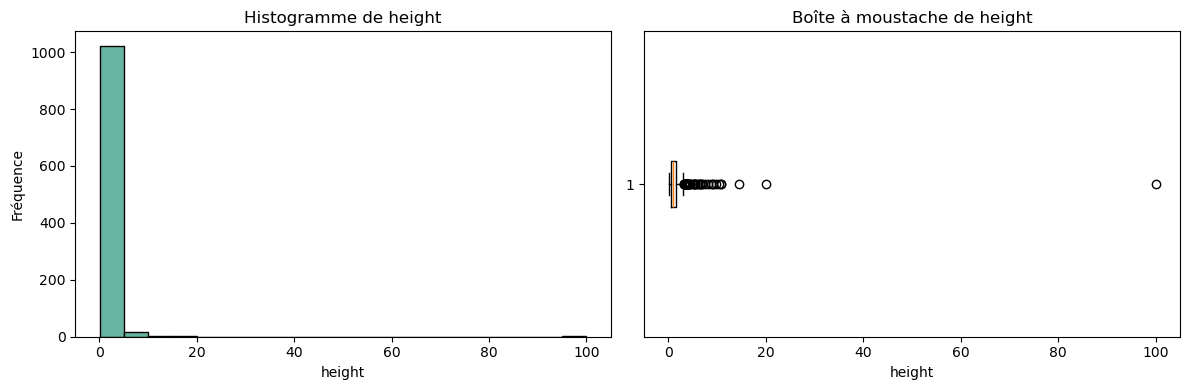

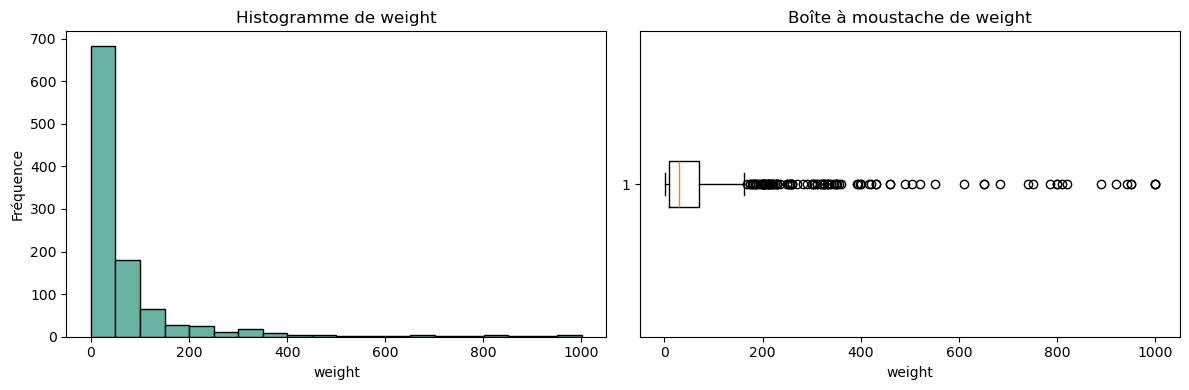

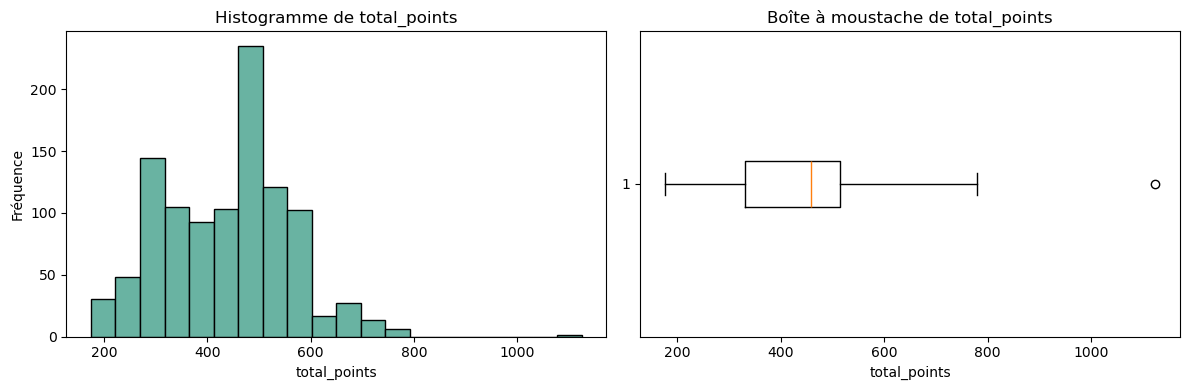

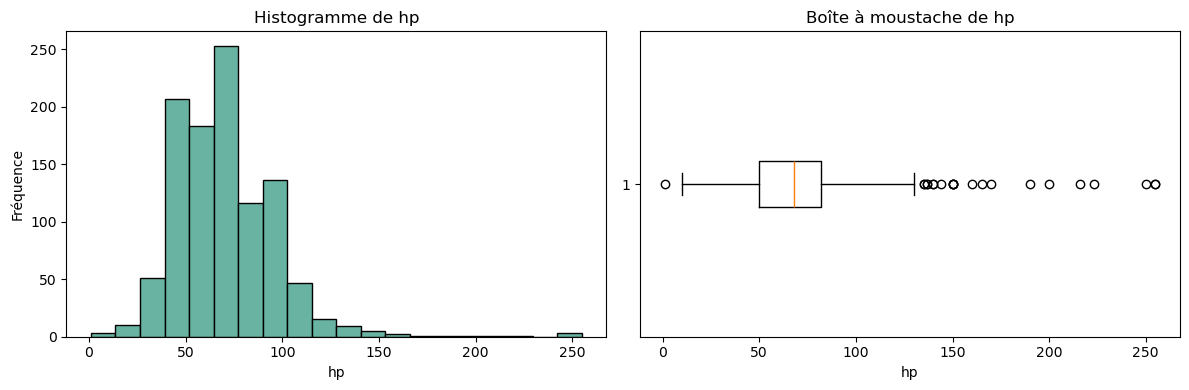

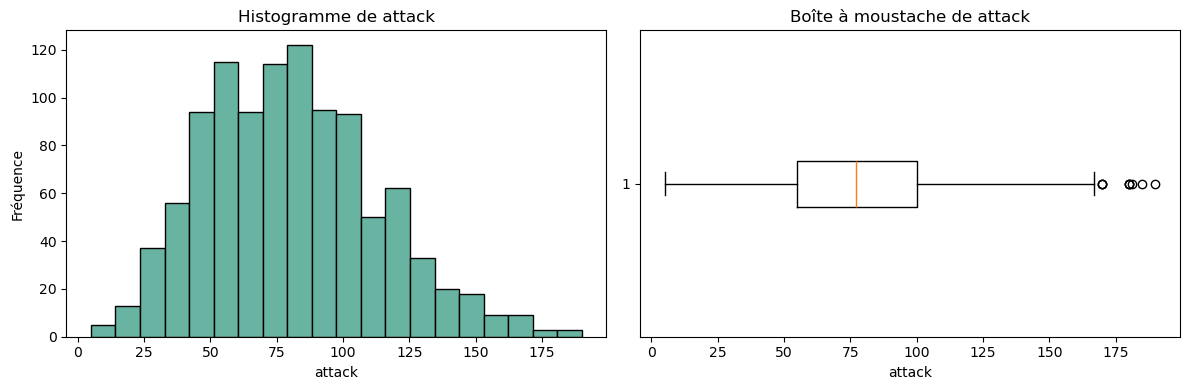

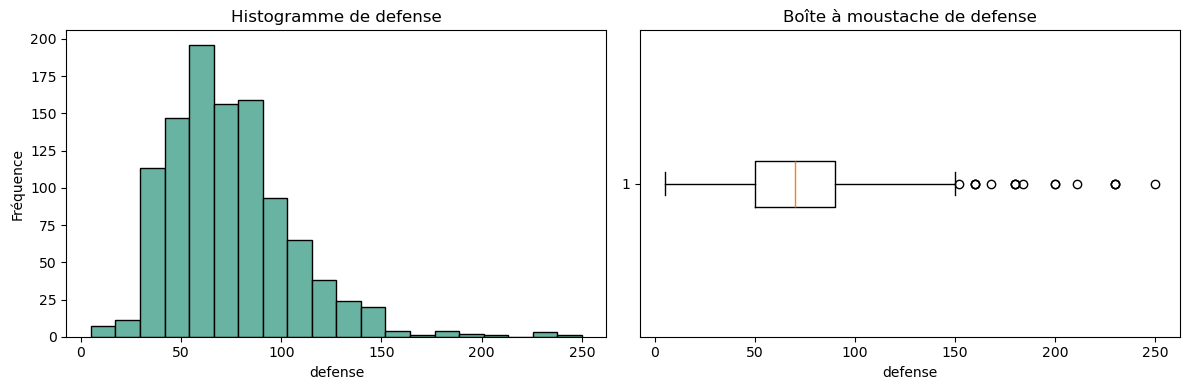

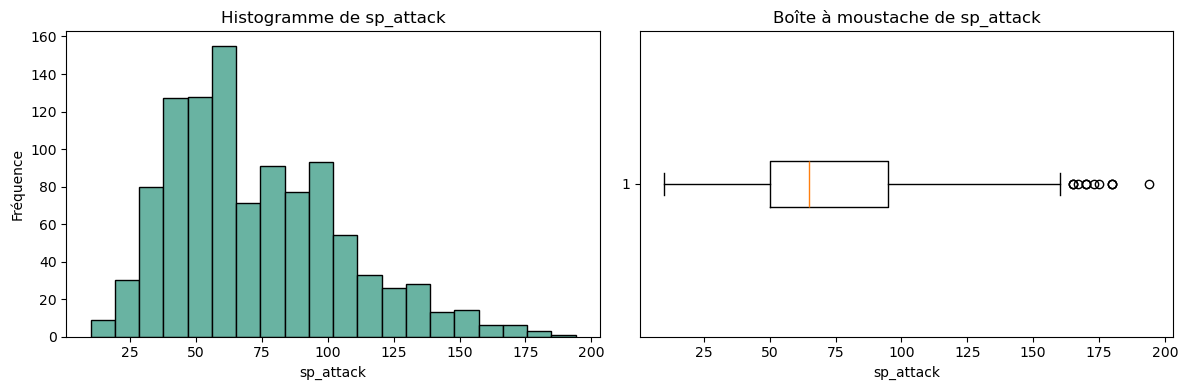

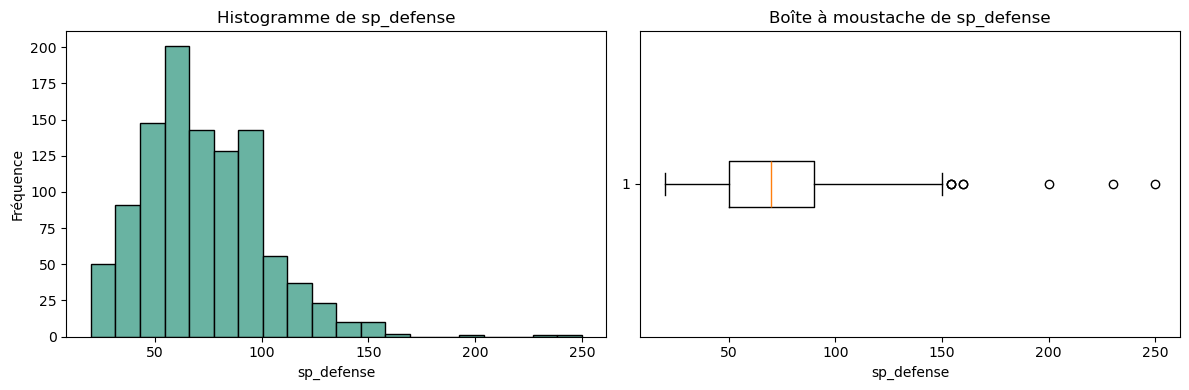

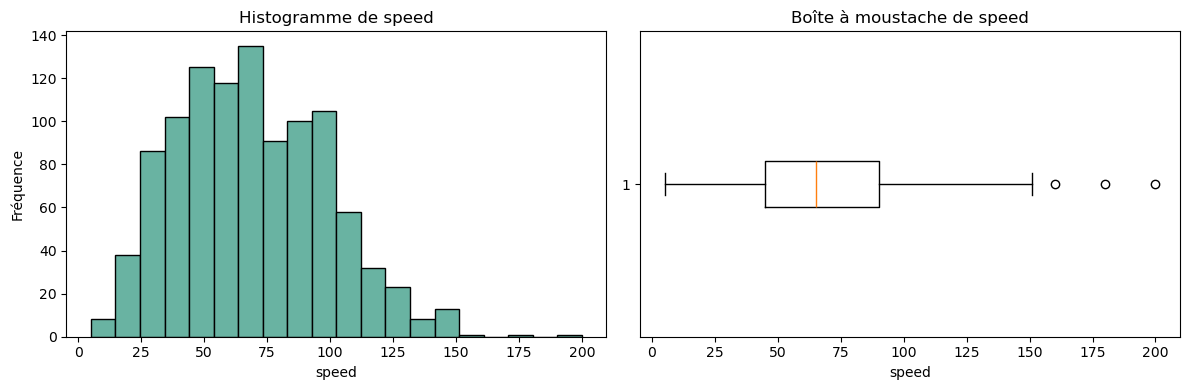

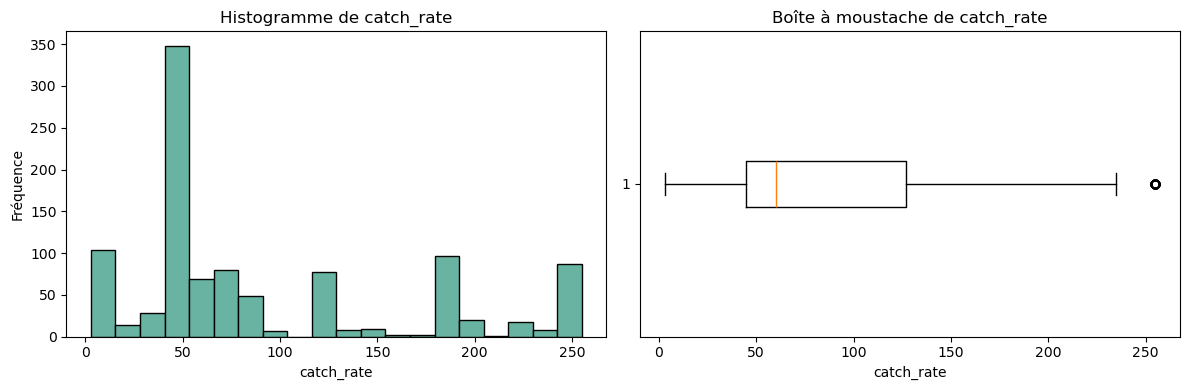

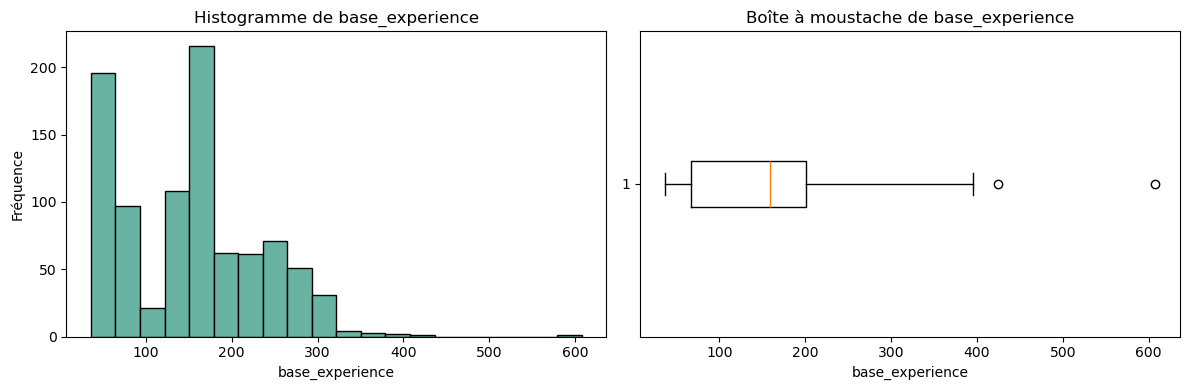

In [49]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

univarColumnList = [
    'height','weight','total_points','hp','attack','defense',
    'sp_attack','sp_defense','speed','catch_rate','base_experience'
]

for column in univarColumnList:
    stats = dfPokemon[column].describe()
    stats['kurtosis'] = dfPokemon[column].kurt()
    stats['skewness'] = dfPokemon[column].skew()

    # --- 1. Bloc HTML avec stats ---
    html_block = f"""
    <div style="border:1px solid #ddd; padding:12px; margin-top:20px; margin-bottom:10px; border-radius:8px; background-color:#fefefe">
        <h3 style="margin-top:0;">Analyse univariée : <i>{column}</i></h3>
        <ul style="margin-left:15px;">
            <li><b>Count</b> : {stats['count']:.0f}</li>
            <li><b>Mean</b> : {stats['mean']:.2f}</li>
            <li><b>Std</b> : {stats['std']:.2f}</li>
            <li><b>Min</b> : {stats['min']:.2f}</li>
            <li><b>25%</b> : {stats['25%']:.2f}</li>
            <li><b>50% (Median)</b> : {stats['50%']:.2f}</li>
            <li><b>75%</b> : {stats['75%']:.2f}</li>
            <li><b>Max</b> : {stats['max']:.2f}</li>
            <li><b>Skewness</b> : {stats['skewness']:.2f}</li>
            <li><b>Kurtosis</b> : {stats['kurtosis']:.2f}</li>
        </ul>
    </div>
    """
    display(HTML(html_block))

    # --- 2. Plots : histogramme et boxplot côte à côte ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogramme
    axes[0].hist(dfPokemon[column].dropna(), bins=20, color='#69b3a2', edgecolor='black')
    axes[0].set_title(f"Histogramme de {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Fréquence")

    # Boxplot
    axes[1].boxplot(dfPokemon[column].dropna(), vert=False)
    axes[1].set_title(f"Boîte à moustache de {column}")
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()
